In [1]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import statistics

In [2]:
def date_and_msg(datka):
    i = -10

    return datka[0:-10], datka[-10:]

with open('DATA.CSV', 'r') as f:
    data = f.read()

data_list = data.split(';')

In [3]:
new_data_list_2d = []
row = []
i = 0
for item in data_list:        
    if i != 0 and divmod(i, 4)[1] == 0:
        lastmsg, newdate = date_and_msg(item)
        row += [lastmsg]
        new_data_list_2d += [row]
        row = [newdate]
    else:
        row += [item]
    i += 1
new_data_list_2d[-1][4] = '11'     

In [4]:
with open("out.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(new_data_list_2d)

In [5]:
time_1row_data_list_2d = []
sep1_data = []
sep2_data = []
sep3_data = []

for row in new_data_list_2d:
    datetime_str = row[0] + row[1]
    datetime_object = datetime.strptime(datetime_str, '%d.%m.%Y %H:%M:%S')
    row2 = float(row[2])
    row3 = float(row[3])
    row4 = float(row[4])
    time_1row_data_list_2d += [[datetime_object  , row2, row3, row4]]
    if datetime_object < datetime(2022, 9, 2) and datetime_object > datetime(2022, 8, 31, 23, 59, 59):
        sep1_data += [[datetime_object  , row2, row3, row4]]
    if datetime_object < datetime(2022, 9, 3) and datetime_object > datetime(2022, 9, 1, 23, 59, 59):
        sep2_data += [[datetime_object  , row2, row3, row4]]
    if datetime_object < datetime(2022, 9, 4) and datetime_object > datetime(2022, 9, 2, 23, 59, 59):
        sep3_data += [[datetime_object  , row2, row3, row4]]

In [6]:
pm20min = []
averagepm25 = []
averagepm10 = []
init_date = sep1_data[0][0]
for row in sep1_data:
    if row[0] < init_date + timedelta(minutes=20):
        averagepm25 += [row[2]]
        averagepm10 += [row[3]]
    else:        
        pm20min += [[row[0], statistics.mean(averagepm25), statistics.mean(averagepm10)]]        
        averagepm25 = []
        averagepm10 = []
        init_date = row[0] + timedelta(minutes=20)
pm20min += [[row[0], statistics.mean(averagepm25), statistics.mean(averagepm10)]]

pm20minsep2 = []
averagepm25 = []
averagepm10 = []
init_date = sep2_data[0][0]
for row in sep2_data:
    if row[0] < init_date + timedelta(minutes=20):
        averagepm25 += [row[2]]
        averagepm10 += [row[3]]
    else:        
        pm20minsep2 += [[row[0], statistics.mean(averagepm25), statistics.mean(averagepm10)]]        
        averagepm25 = []
        averagepm10 = []
        init_date = row[0] + timedelta(minutes=20)
pm20minsep2 += [[row[0], statistics.mean(averagepm25), statistics.mean(averagepm10)]]

pm20minsep3 = []
averagepm25 = []
averagepm10 = []
init_date = sep3_data[0][0]
for row in sep3_data:
    if row[0] < init_date + timedelta(minutes=20):
        averagepm25 += [row[2]]
        averagepm10 += [row[3]]
    else:        
        pm20minsep3 += [[row[0], statistics.mean(averagepm25), statistics.mean(averagepm10)]]        
        averagepm25 = []
        averagepm10 = []
        init_date = row[0] + timedelta(minutes=20)
pm20minsep3 += [[row[0], statistics.mean(averagepm25), statistics.mean(averagepm10)]]

In [7]:
with open('us_1_sep.csv', 'r') as f:
    data_us = f.read()

data_us_list = data_us.split('\n')
sep1_us_data = []


for row in data_us_list:
    try:
        ustime, _, val = row.replace('"', '').split(',')
        datetime_object = datetime.strptime("01.09.2022 " + ustime, '%d.%m.%Y %H:%M')
        sep1_us_data += [[datetime_object, float(val)*10**-4]]
    except:
        print(row)
df_us = pd.DataFrame(sep1_us_data)

# sep 2
with open('us_2_sep.csv', 'r') as f:
    data_us = f.read()

data_us_list = data_us.split('\n')
sep2_us_data = []


for row in data_us_list:
    try:
        ustime, _, val = row.replace('"', '').split(',')
        datetime_object = datetime.strptime("02.09.2022 " + ustime, '%d.%m.%Y %H:%M')
        sep2_us_data += [[datetime_object, float(val)*10**-4]]
    except:
        print(row)
df_us_sep2 = pd.DataFrame(sep2_us_data)

# sep 3
with open('us_3_sep.csv', 'r') as f:
    data_us = f.read()

data_us_list = data_us.split('\n')
sep3_us_data = []


for row in data_us_list:
    try:
        ustime, _, val = row.replace('"', '').split(',')
        datetime_object = datetime.strptime("03.09.2022 " + ustime, '%d.%m.%Y %H:%M')
        sep3_us_data += [[datetime_object, float(val)*10**-4]]
    except:
        print(row)
df_us_sep3 = pd.DataFrame(sep3_us_data)


24:00,"0,0065"

24:00,"0,0031"

24:00,"0,0039"



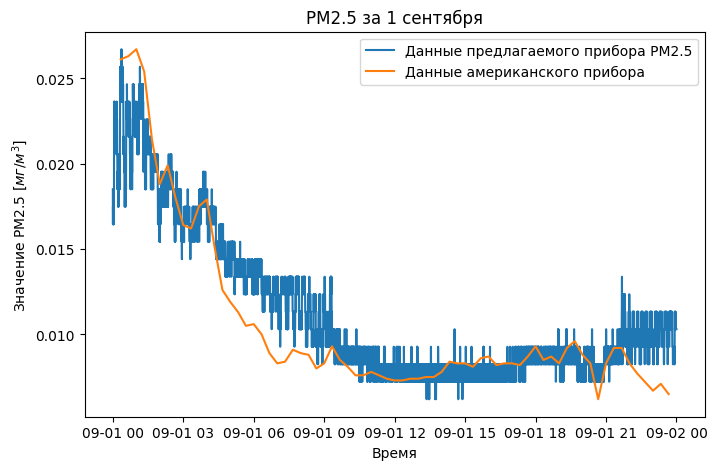

In [8]:
lst = sep1_data
  
# Calling DataFrame constructor on list
df = pd.DataFrame(lst)
fig, ax = plt.subplots(1,1, figsize = (8,5))
#0.0267
#0.006200000000000001
plt.title('PM2.5 за 1 сентября')
plt.xlabel('Время')
plt.ylabel('Значение PM2.5 [$мг/м^3$]')
ax.plot(df[0], df[2] / 20 * (0.0267 - 0.0062) + 0.0062, label='Данные предлагаемого прибора PM2.5')
ax.plot(df_us[0], df_us[1], label='Данные американского прибора')
ax.legend()

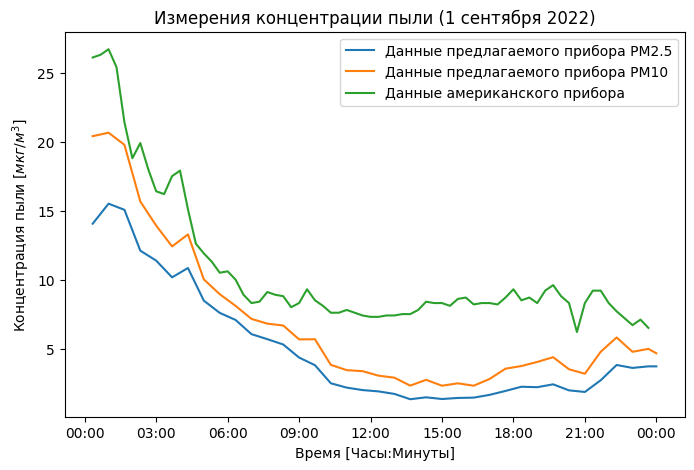

In [9]:
# Calling DataFrame constructor on list
df = pd.DataFrame(pm20min)
fig, ax = plt.subplots(1,1, figsize = (8,5))
#0.0267
#0.006200000000000001
plt.title('Измерения концентрации пыли (1 сентября 2022)')
plt.xlabel('Время [Часы:Минуты]')
plt.ylabel('Концентрация пыли [$мкг/м^3$]')
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
ax.plot(df[0], df[1], label='Данные предлагаемого прибора PM2.5')
ax.plot(df[0], df[2], label='Данные предлагаемого прибора PM10')
ax.plot(df_us[0], df_us[1]*1000, label='Данные американского прибора')
ax.legend()

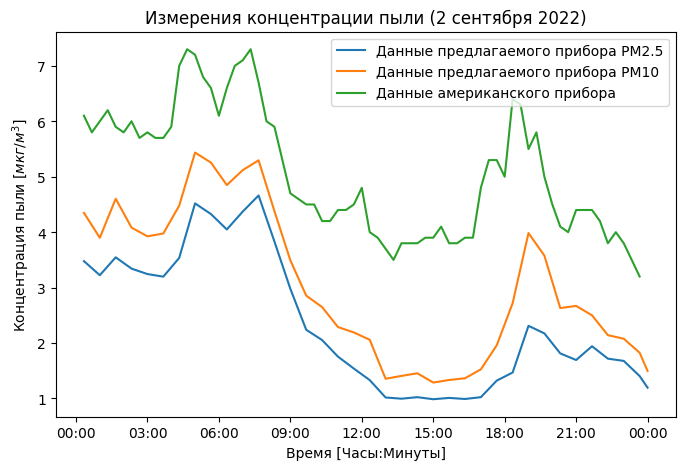

In [10]:
# Calling DataFrame constructor on list
dfsep2 = pd.DataFrame(pm20minsep2)
fig, ax = plt.subplots(1,1, figsize = (8,5))
#0.0267
#0.006200000000000001
plt.title('Измерения концентрации пыли (2 сентября 2022)')
plt.xlabel('Время [Часы:Минуты]')
plt.ylabel('Концентрация пыли [$мкг/м^3$]')
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
ax.plot(dfsep2[0], dfsep2[1], label='Данные предлагаемого прибора PM2.5')
ax.plot(dfsep2[0], dfsep2[2], label='Данные предлагаемого прибора PM10')
ax.plot(df_us_sep2[0], df_us_sep2[1]*1000, label='Данные американского прибора')
ax.legend()

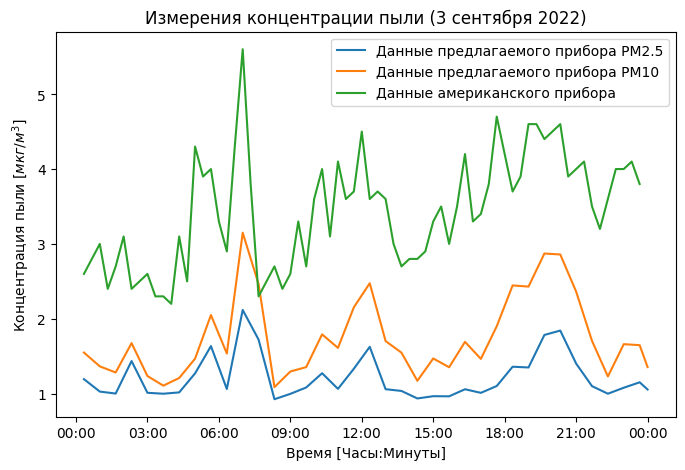

In [11]:
# Calling DataFrame constructor on list
dfsep3 = pd.DataFrame(pm20minsep3)
fig, ax = plt.subplots(1,1, figsize = (8,5))
#0.0267
#0.006200000000000001
plt.title('Измерения концентрации пыли (3 сентября 2022)')
plt.xlabel('Время [Часы:Минуты]')
plt.ylabel('Концентрация пыли [$мкг/м^3$]')
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
ax.plot(dfsep3[0], dfsep3[1], label='Данные предлагаемого прибора PM2.5')
ax.plot(dfsep3[0], dfsep3[2], label='Данные предлагаемого прибора PM10')
ax.plot(df_us_sep3[0], df_us_sep3[1]*1000, label='Данные американского прибора')
ax.legend()